In [1]:
# !pip install fredapi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import date
from sklearn.preprocessing import MinMaxScaler
import dotenv
import os

plt.style.use('Solarize_Light2')
pd.options.display.max_columns=30
pd.options.display.max_rows=30

from fredapi import Fred

## API access and data import

In [3]:
dotenv.load_dotenv('senhas.env')
fred_key = os.getenv('fred_key')

In [4]:
fred = Fred(api_key=fred_key)

Date period

In [5]:
start='2000-01-01'
end= date.today()

All-Transactions House Price Index for the United States (USSTHPI)

Units: Index 1980:Q1=100, Not Seasonally Adjusted

Frequency: Quarterly

Estimated using sales prices and appraisal data.

In [6]:
national_house_price = fred.get_series(series_id= 'USSTHPI', observation_start= start, observation_end=end)
national_house_price = pd.DataFrame(national_house_price).reset_index().rename(columns={'index':'Date', 0:'House_Price_Index'})
national_house_price

,Date,House_Price_Index
0,2000-01-01,230.18
1,2000-04-01,233.93
2,2000-07-01,238.19
3,2000-10-01,241.84
4,2001-01-01,247.82
...,...,...
86,2021-07-01,539.48
87,2021-10-01,558.11
88,2022-01-01,578.70
89,2022-04-01,618.37


In [7]:
national_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               91 non-null     datetime64[ns]
 1   House_Price_Index  91 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


S&P 500 (SP500)

Units:  Index, Not Seasonally Adjusted

Frequency:  Daily, Close

The S&P 500 is regarded as a gauge of the large cap U.S. equities market. The index includes 500 leading companies in leading industries of the U.S. economy, which are publicly held on either the NYSE or NASDAQ, and covers 75% of U.S. equities. Since this is a price index and not a total return index, the S&P 500 index here does not contain dividends.

In [8]:
sp500 = fred.get_series(series_id= 'SP500',observation_start= '2000-01-01', observation_end='2022-12-01')
sp500 = pd.DataFrame(sp500).reset_index().rename(columns={'index':'Day', 0:'SP500'})
sp500

,Day,SP500
0,2012-12-03,1409.46
1,2012-12-04,1407.05
2,2012-12-05,1409.28
3,2012-12-06,1413.94
4,2012-12-07,1418.07
...,...,...
2604,2022-11-25,4026.12
2605,2022-11-28,3963.94
2606,2022-11-29,3957.63
2607,2022-11-30,4080.11


In [9]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2609 entries, 0 to 2608
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Day     2609 non-null   datetime64[ns]
 1   SP500   2518 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.9 KB


Unemployment Rate (UNRATE)

Units:  Percent, Seasonally Adjusted

Frequency:  Monthly

The unemployment rate represents the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces.

In [10]:
unemployment = fred.get_series(series_id= 'UNRATE', observation_start= start, observation_end=end)
unemployment = pd.DataFrame(unemployment).reset_index().rename(columns={'index':'Date', 0:'Unemployment'})
unemployment

,Date,Unemployment
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0
...,...,...
270,2022-07-01,3.5
271,2022-08-01,3.7
272,2022-09-01,3.5
273,2022-10-01,3.7


In [11]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          275 non-null    datetime64[ns]
 1   Unemployment  275 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB


Median Consumer Price Index (MEDCPIM158SFRBCLE)

Units:  Percent Change at Annual Rate, Seasonally Adjusted

Frequency:  Monthly

Median Consumer Price Index (CPI) is a measure of core inflation calculated the Federal Reserve Bank of Cleveland and the Ohio State University. Median CPI was created as a different way to get a 'Core CPI' measure, or a better measure of underlying inflation trends. To calculate the Median CPI, the Cleveland Fed analyzes the median price change of the goods and services published by the BLS. The median price change is the price change that's right in the middle of the long list of all of the price changes. This series excludes 49.5% of the CPI components with the highest and lowest one-month price changes from each tail of the price-change distribution resulting in a Median CPI Inflation Estimate.

According to research from the Cleveland Fed, the Median CPI provides a better signal of the inflation trend than either the all-items CPI or the CPI excluding food and energy. According to newer research done at the Cleveland Fed, the Median CPI is even better at PCE inflation in the near and longer term than the core PCE.

In [12]:
inflation = fred.get_series(series_id= 'MEDCPIM158SFRBCLE', observation_start= start, observation_end=end)
inflation = pd.DataFrame(inflation).reset_index().rename(columns={'index':'Date', 0:'Inflation'})
inflation

,Date,Inflation
0,2000-01-01,3.851771
1,2000-02-01,2.785584
2,2000-03-01,3.416809
3,2000-04-01,2.276901
4,2000-05-01,2.853534
...,...,...
269,2022-06-01,9.130538
270,2022-07-01,6.483074
271,2022-08-01,9.222973
272,2022-09-01,8.307776


In [13]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       274 non-null    datetime64[ns]
 1   Inflation  274 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB


Federal Funds Effective Rate (DFF)

Units:  Percent, Not Seasonally Adjusted

Frequency:  Daily, 7-Day

The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need of larger balances. In simpler terms, a bank with excess cash, which is often referred to as liquidity, will lend to another bank that needs to quickly raise liquidity. (1) The rate that the borrowing institution pays to the lending institution is determined between the two banks; the weighted average rate for all of these types of negotiations is called the effective federal funds rate.(2) The effective federal funds rate is essentially determined by the market but is influenced by the Federal Reserve through open market operations to reach the federal funds rate target.(2)

In [14]:
federal_funds_rate = fred.get_series(series_id= 'DFF', observation_start= start, observation_end=end)
federal_funds_rate = pd.DataFrame(federal_funds_rate).reset_index().rename(columns={'index':'Date', 0:'FF_Rate'})
federal_funds_rate

,Date,FF_Rate
0,2000-01-01,3.99
1,2000-01-02,3.99
2,2000-01-03,5.43
3,2000-01-04,5.38
4,2000-01-05,5.41
...,...,...
8366,2022-11-27,3.83
8367,2022-11-28,3.83
8368,2022-11-29,3.83
8369,2022-11-30,3.83


## Data Cleaning and Preprocessing

In [15]:
sp500_date_conversion = sp500.groupby(sp500['Day'].dt.strftime('%m %Y')).first().rename(columns={"Day":"Month"}).reset_index(drop=True)
sp500_date_conversion['Date'] = pd.to_datetime(sp500_date_conversion['Month'].dt.year.astype(str)+'/'+sp500_date_conversion['Month'].dt.month.astype(str)+'/01')


In [16]:
sp500_month = sp500_date_conversion.drop(columns='Month').sort_values('Date').reset_index().drop(columns='index')
sp500_month.head()

,SP500,Date
0,1409.46,2012-12-01
1,1462.42,2013-01-01
2,1513.17,2013-02-01
3,1518.20,2013-03-01
4,1562.17,2013-04-01


In [17]:
sp500_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   SP500   121 non-null    float64       
 1   Date    121 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


In [18]:
pd.options.display.float_format = '{:,.5f}'.format

In [19]:
national_house_price_norm = national_house_price.copy()
column = 'House_Price_Index'
national_house_price_norm[column] = MinMaxScaler().fit_transform(np.array(national_house_price_norm[column]).reshape(-1,1))
national_house_price_norm

,Date,House_Price_Index
0,2000-01-01,0.00000
1,2000-04-01,0.00941
2,2000-07-01,0.02009
3,2000-10-01,0.02925
4,2001-01-01,0.04424
...,...,...
86,2021-07-01,0.77577
87,2021-10-01,0.82250
88,2022-01-01,0.87414
89,2022-04-01,0.97364


In [20]:
sp500_month_norm = sp500_month.copy()
column = 'SP500'
sp500_month_norm[column] = MinMaxScaler().fit_transform(np.array(sp500_month_norm[column]).reshape(-1,1))
sp500_month_norm

,SP500,Date
0,0.00000,2012-12-01
1,0.01564,2013-01-01
2,0.03062,2013-02-01
3,0.03210,2013-03-01
4,0.04509,2013-04-01
...,...,...
116,0.79985,2022-08-01
117,0.75504,2022-09-01
118,0.66989,2022-10-01
119,0.72234,2022-11-01


In [21]:
unemployment_norm = unemployment.copy()
column = 'Unemployment'
unemployment_norm[column] = MinMaxScaler().fit_transform(np.array(unemployment_norm[column]).reshape(-1,1))
unemployment_norm

,Date,Unemployment
0,2000-01-01,0.04464
1,2000-02-01,0.05357
2,2000-03-01,0.04464
3,2000-04-01,0.02679
4,2000-05-01,0.04464
...,...,...
270,2022-07-01,0.00000
271,2022-08-01,0.01786
272,2022-09-01,0.00000
273,2022-10-01,0.01786


In [22]:
inflation_norm = inflation.copy()
column = 'Inflation'
inflation_norm[column] = MinMaxScaler().fit_transform(np.array(inflation_norm[column]).reshape(-1,1))
inflation_norm

,Date,Inflation
0,2000-01-01,0.43515
1,2000-02-01,0.32302
2,2000-03-01,0.38941
3,2000-04-01,0.26953
4,2000-05-01,0.33017
...,...,...
269,2022-06-01,0.99028
270,2022-07-01,0.71186
271,2022-08-01,1.00000
272,2022-09-01,0.90376


In [23]:
federal_funds_rate_norm = federal_funds_rate.copy()
column = 'FF_Rate'
federal_funds_rate_norm[column] = MinMaxScaler().fit_transform(np.array(federal_funds_rate_norm[column]).reshape(-1,1))
federal_funds_rate_norm

,Date,FF_Rate
0,2000-01-01,0.56509
1,2000-01-02,0.56509
2,2000-01-03,0.77110
3,2000-01-04,0.76395
4,2000-01-05,0.76824
...,...,...
8366,2022-11-27,0.54220
8367,2022-11-28,0.54220
8368,2022-11-29,0.54220
8369,2022-11-30,0.54220


In [24]:
df_with_sp500 = national_house_price.merge(sp500_month).merge(unemployment).merge(inflation).merge(federal_funds_rate)
df_with_sp500.head()

,Date,House_Price_Index,SP500,Unemployment,Inflation,FF_Rate
0,2013-01-01,316.79000,"1,462.42000",8.00000,2.74181,0.09000
1,2013-04-01,321.63000,"1,562.17000",7.60000,2.08888,0.16000
2,2013-07-01,326.28000,"1,614.96000",7.30000,2.00320,0.10000
3,2013-10-01,328.89000,"1,695.00000",7.20000,1.16373,0.08000
4,2014-01-01,331.62000,"1,831.98000",6.60000,2.40633,0.07000


In [25]:
df_with_sp500_norm = national_house_price_norm.merge(sp500_month_norm).merge(unemployment_norm).merge(inflation_norm).merge(federal_funds_rate_norm)
df_with_sp500_norm.head()

,Date,House_Price_Index,SP500,Unemployment,Inflation,FF_Rate
0,2013-01-01,0.21723,0.01564,0.40179,0.31842,0.00715
1,2013-04-01,0.22937,0.04509,0.36607,0.24976,0.01717
2,2013-07-01,0.24103,0.06067,0.33929,0.24075,0.00858
3,2013-10-01,0.24758,0.08430,0.33036,0.15246,0.00572
4,2014-01-01,0.25443,0.12474,0.27679,0.28314,0.00429


In [26]:
df_without_sp500_norm = national_house_price_norm.merge(unemployment_norm).merge(inflation_norm).merge(federal_funds_rate_norm)
df_without_sp500_norm.head()

,Date,House_Price_Index,Unemployment,Inflation,FF_Rate
0,2000-01-01,0.00000,0.04464,0.43515,0.56509
1,2000-04-01,0.00941,0.02679,0.26953,0.87697
2,2000-07-01,0.02009,0.04464,0.39146,0.97568
3,2000-10-01,0.02925,0.03571,0.31414,0.93848
4,2001-01-01,0.04424,0.06250,0.45878,0.76824


In [27]:
df_without_sp500 = national_house_price.merge(unemployment).merge(inflation).merge(federal_funds_rate)
df_without_sp500.head()

,Date,House_Price_Index,Unemployment,Inflation,FF_Rate
0,2000-01-01,230.18000,4.00000,3.85177,3.99000
1,2000-04-01,233.93000,3.80000,2.27690,6.17000
2,2000-07-01,238.19000,4.00000,3.43636,6.86000
3,2000-10-01,241.84000,3.90000,2.70107,6.60000
4,2001-01-01,247.82000,4.20000,4.07648,5.41000


## Check correlations

In [28]:
df_with_sp500.corr()['House_Price_Index']

House_Price_Index    1.00000
SP500                0.95622
Unemployment        -0.21496
Inflation            0.72347
FF_Rate              0.17527
Name: House_Price_Index, dtype: float64

In [29]:
df_without_sp500.corr()['House_Price_Index']

House_Price_Index    1.00000
Unemployment        -0.19083
Inflation            0.48871
FF_Rate             -0.25975
Name: House_Price_Index, dtype: float64

## Export Data

In [30]:
df_with_sp500.to_excel('df_with_sp500_jupyter.xlsx', index=False)

In [31]:
df_with_sp500_norm.to_excel('df_with_sp500_normalized_jupyter.xlsx', index=False)

In [32]:
df_without_sp500.to_excel('df_without_sp500_jupyter.xlsx', index=False)

In [33]:
df_without_sp500_norm.to_excel('df_without_sp500_normalized_jupyter.xlsx', index=False)

## Graphics 

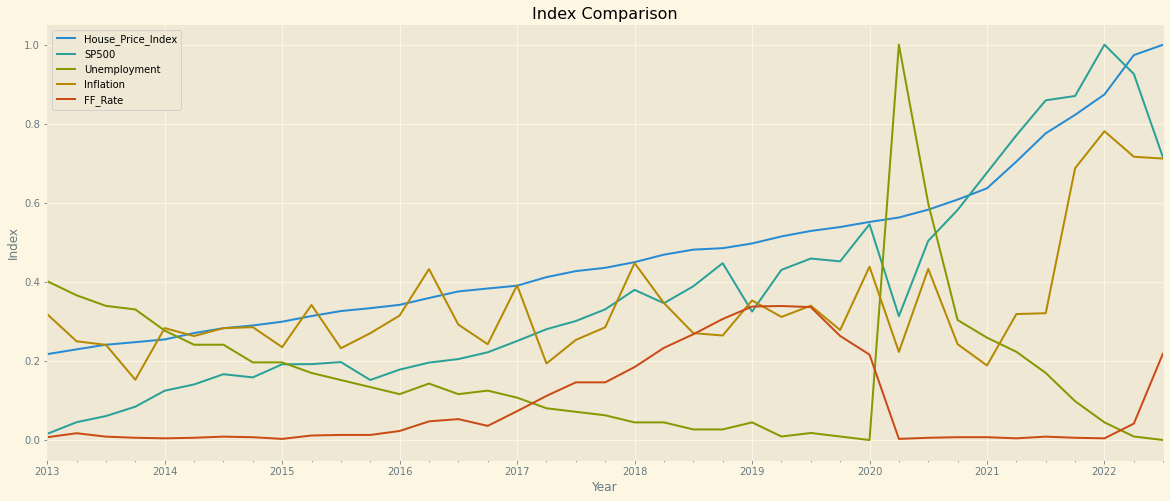

In [34]:
grp_df_with_sp500_norm = df_with_sp500_norm.plot(figsize=(20,8), x='Date')
grp_df_with_sp500_norm.set_title("Index Comparison", fontsize=16)
grp_df_with_sp500_norm.set_xlabel("Year", fontsize=12)
grp_df_with_sp500_norm.set_ylabel("Index", fontsize=12)
plt.legend(loc="upper left");

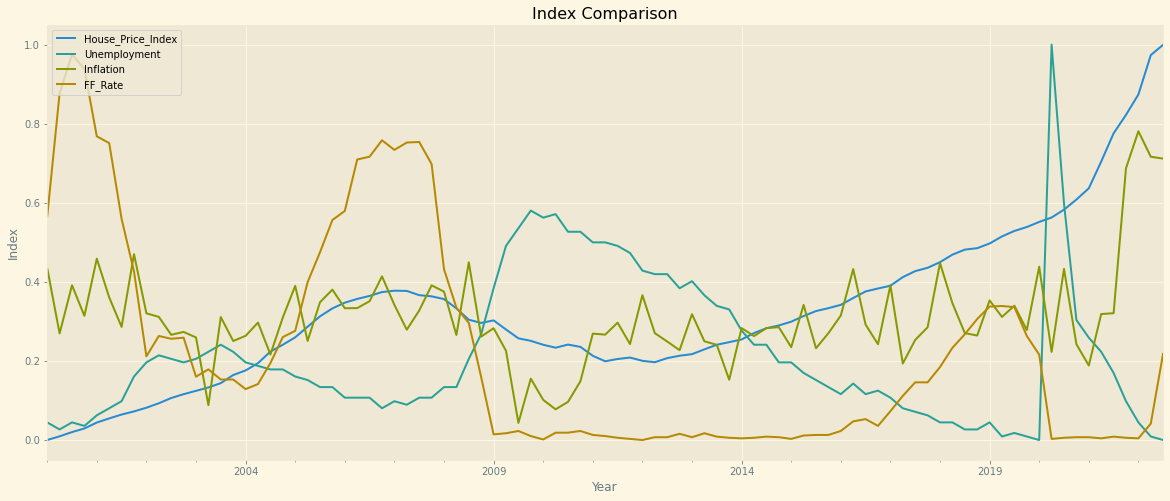

In [35]:
grp_df_without_sp500_norm = df_without_sp500_norm.plot(figsize=(20,8), x='Date')
grp_df_without_sp500_norm.set_title("Index Comparison", fontsize=16)
grp_df_without_sp500_norm.set_xlabel("Year", fontsize=12)
grp_df_without_sp500_norm.set_ylabel("Index", fontsize=12)
plt.legend(loc="upper left");